In [37]:
import numpy as np
    
class NeuralNetwork:
    def __init__(self, x, y):
        self.input      = x
        self.weights1   = np.random.rand(self.input.shape[1],1) 
        #self.weights2   = np.random.rand(12,1)                 
        self.y          = y
        self.output     = np.zeros(self.y.shape)
    
    def feedforward(self):
        self.layer1 = np.greater(np.zeros(self.input.shape[0]),np.dot(self.input, self.weights1))
        #self.output = np.greater(np.zeros(self.input.shape[1]),np.dot(self.layer1, self.weights2))
    
    def relu_derivative(self,x):
        x[x<=0] = 0
        x[x>0] = 1
        return x

    def backprop(self):
        # application of the chain rule to find derivative of the loss function with respect to weights2 and weights1
        #self.output_new = self.output[1:0] 
        #print(self.output_new.shape)
        #self.output_new = np.reshape(self.output_new,)
        #d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * relu_derivative(self.output)))
        d_weights1 = (np.dot(2*(self.y - self.layer1) * self.relu_derivative(self.layer1), self.weights1.T))

        # update the weights with the derivative (slope) of the loss function
        self.weights1 += d_weights1
        #self.weights2 += d_weights2
        


In [ ]:
from numpy import genfromtxt
X = genfromtxt('./sub_data/set1x.csv',delimiter=',')  # train data

print(X.shape)

# output array
Y = genfromtxt('./sub_data/sety1.csv',delimiter=',') # train data

Y = np.reshape(Y,(7343,1))
print(Y)


a1 = NeuralNetwork(X,Y.T)
a1.feedforward();
a1.backprop();

Epoch 99
Train accuracy: 0.521585183168


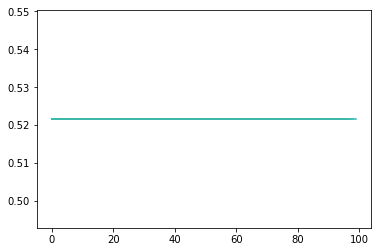

In [5]:
from __future__ import print_function
import numpy as np ## For numerical python
#np.random.seed(42)

class Layer:
    
    #A building block. Each layer is capable of performing two things:

    #- Process input to get output:           output = layer.forward(input)
    
    #- Propagate gradients through itself:    grad_input = layer.backward(input, grad_output)
    
    #Some layers also have learnable parameters which they update during layer.backward.
    
    def __init__(self):
        # Here we can initialize layer parameters (if any) and auxiliary stuff.
        # A dummy layer does nothing
        pass
    
    def forward(self, input):
        # Takes input data of shape [batch, input_units], returns output data [batch, output_units]
        
        # A dummy layer just returns whatever it gets as input.
        return input
    

    def backward(self, input, grad_output):
        # Performs a backpropagation step through the layer, with respect to the given input.
        
        # To compute loss gradients w.r.t input, we need to apply chain rule (backprop):
        
        # d loss / d x  = (d loss / d layer) * (d layer / d x)
        
        # Luckily, we already receive d loss / d layer as input, so you only need to multiply it by d layer / d x.
        
        # If our layer has parameters (e.g. dense layer), we also need to update them here using d loss / d layer
        
        # The gradient of a dummy layer is precisely grad_output, but we'll write it more explicitly
        num_units = input.shape[1]
        
        d_layer_d_input = np.eye(num_units)
        
        return np.dot(grad_output, d_layer_d_input) # chain rule
    
    
    
class ReLU(Layer):
    def __init__(self):
        # ReLU layer simply applies elementwise rectified linear unit to all inputs
        pass
    
    def forward(self, input):
        # Apply elementwise ReLU to [batch, input_units] matrix
        relu_forward = np.maximum(0,input)
        return relu_forward
    
    def backward(self, input, grad_output):
        # Compute gradient of loss w.r.t. ReLU input
        relu_grad = input > 0
        return grad_output*relu_grad
    
class Dense(Layer):
    def __init__(self, input_units, output_units, learning_rate=0.1):
        # A dense layer is a layer which performs a learned affine transformation:
        # f(x) = <W*x> + b
        
        self.learning_rate = learning_rate
        self.weights = np.random.normal(loc=0.0, 
                                        scale = np.sqrt(2/(input_units+output_units)), 
                                        size = (input_units,output_units))
        self.biases = np.zeros(output_units)
        
    def forward(self,input):
        # Perform an affine transformation:
        # f(x) = <W*x> + b
        
        # input shape: [batch, input_units]
        # output shape: [batch, output units]
        return np.dot(input,self.weights) + self.biases 
    
    def backward(self,input,grad_output):
        # compute d f / d x = d f / d dense * d dense / d x
        # where d dense/ d x = weights transposed
        grad_input = np.dot(grad_output, self.weights.T)
        
        # compute gradient w.r.t. weights and biases
        grad_weights = np.dot(input.T, grad_output)
        grad_biases = grad_output.mean(axis=0)*input.shape[0]
        
        assert grad_weights.shape == self.weights.shape and grad_biases.shape == self.biases.shape
        
        # Here we perform a stochastic gradient descent step. 
        self.weights = self.weights - self.learning_rate * grad_weights
        self.biases = self.biases - self.learning_rate * grad_biases
        
        return grad_input
    
def softmax(X):
    exps = np.exp(X)
    return exps / np.sum(exps)
    
# def softmax_crossentropy_with_logits(logits,reference_answers):
#     m = reference_answers.shape[0]
#     p = softmax(logits)
#     x = range(m)
#     print(reference_answers.shape)
#     log_likelihood = -np.log(p)
#     loss = np.sum(log_likelihood) / m
#     return loss

def softmax_crossentropy_with_logits(logits,reference_answers):
    sigmoid = 1/(1+np.exp(logits))
    list1 = []
    for i in range(0,32):
        if reference_answers[i]==1:
            return -np.log(sigmoid)
        if reference_answers[i]==0:
            return -np.log(1-sigmoid)
            
def grad_softmax_crossentropy_with_logits(logits,reference_answers):
    sigmoid = 1/(1+np.exp(logits))
    list2 = []
    for i in range(0,32):
        if reference_answers[i]==1:
            return sigmoid-1
        if reference_answers[i]==0:
            return sigmoid
    
import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy import genfromtxt
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import scipy

def load_dataset(flatten=False):
    #(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
    X_train = genfromtxt('/home/karthik/Desktop/Epilepsy detection/set1x.csv',delimiter = ',')
    y_train = genfromtxt('/home/karthik/Desktop/Epilepsy detection/sety1.csv',delimiter = ',')
    X_test =  genfromtxt('/home/karthik/Desktop/Epilepsy detection/p1x.csv',delimiter = ',')
    y_test =  genfromtxt('/home/karthik/Desktop/Epilepsy detection/p1y.csv',delimiter = ',')
    
    return X_train, y_train,X_test, y_test

X_train, y_train,X_test, y_test = load_dataset(flatten=True)


network = []

network.append(Dense(12,100))
network.append(ReLU())
f = [100,200,300,400]
for i in range(len(f)-1):
    network.append(Dense(f[i],f[i+1]))
    network.append(ReLU())
network.append(Dense(f[-1],1))

def forward(network, X):
    # Compute activations of all network layers by applying them sequentially.
    # Return a list of activations for each layer. 
    
    activations = []
    input = X

    # Looping through each layer
    for l in network:
        activations.append(l.forward(input))
        # Updating input to last layer output
        input = activations[-1]
    
    assert len(activations) == len(network)
    return activations

def predict(network,X):
    # Compute network predictions. Returning indices of largest Logit probability

    logits = forward(network,X)[-1]
    return logits.argmax(axis=-1)

def train(network,X,y):
    # Train our network on a given batch of X and y.
    # We first need to run forward to get all layer activations.
    # Then we can run layer.backward going from last to first layer.
    # After we have called backward for all layers, all Dense layers have already made one gradient step.
    
    
    # Get the layer activations
    layer_activations = forward(network,X)
    layer_inputs = [X]+layer_activations  #layer_input[i] is an input for network[i]
    logits = layer_activations[-1]
    
    # Compute the loss and the initial gradient
    loss = softmax_crossentropy_with_logits(logits,y)
    loss_grad = grad_softmax_crossentropy_with_logits(logits,y)
    
    # Propagate gradients through the network
    # Reverse propogation as this is backprop
    for layer_index in range(len(network))[::-1]:
        layer = network[layer_index]
        
        loss_grad = layer.backward(layer_inputs[layer_index],loss_grad) #grad w.r.t. input, also weight updates
        
    return np.mean(loss)

from tqdm import trange
def iterate_minibatches(inputs, targets, batchsize, shuffle=False):
    assert len(inputs) == len(targets)
    if shuffle:
        indices = np.random.permutation(len(inputs))
    for start_idx in trange(0, len(inputs) - batchsize + 1, batchsize):
        if shuffle:
            excerpt = indices[start_idx:start_idx + batchsize]
        else:
            excerpt = slice(start_idx, start_idx + batchsize)
        yield inputs[excerpt], targets[excerpt]

from IPython.display import clear_output
train_log = []
val_log = []
for epoch in range(100):

    for x_batch,y_batch in iterate_minibatches(X_train,y_train,batchsize=32,shuffle=False):
        train(network,x_batch,y_batch)
    
    train_log.append(np.mean(predict(network,X_train)==y_train))
    #val_log.append(np.mean(predict(network,X_val)==y_val))
    
    clear_output()
    print("Epoch",epoch)
    print("Train accuracy:",train_log[-1])
    #print("Val accuracy:",val_log[-1])
    plt.plot(train_log,label='train accuracy')
    #plt.plot(val_log,label='val accuracy')
    #plt.legend(loc='best')
    #plt.grid()
    #plt.show()



In [ ]:
import numpy as np
from numpy import genfromtxt

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# input array
X = genfromtxt('/home/karthik/Desktop/Epilepsy detection/set1x.csv',delimiter=',')  # train data

X[0][0] = 0

# output array
Y = genfromtxt('/home/karthik/Desktop/Epilepsy detection/sety1.csv',delimiter=',')  # train data
Y = np.reshape(Y,(1,7343))

Y[0][0] = -1

test = genfromtxt('/home/karthik/Desktop/Epilepsy detection/p1x.csv',delimiter=',')
print(X.shape)
print(Y.shape)
print(test.shape)


X_flat = X.T
W = np.random.rand(12, 1) * 0.01
b = 0
m = Y.size
print(np.shape(X))
print(np.shape(Y))

# Activation Function

def activation_function(z):
    #s = np.tanh(z)
    s = 1 / (1 + (np.exp(-z)))
    #leak = 0.2
    #f1 = 0.5 * (1 + leak)
    #f2 = 0.5 * (1 - leak)
    #s = f1 * z + f2 * abs(z)
    return s




epoch = 2000  # Setting training iterations
lr = 0.7  # Setting learning rate
print("Training.....")
for i in range(epoch):
    # Forward Propogation
    Z = np.dot(W.T, X_flat) + b
    A = activation_function(Z)
    #print(A)
    cost = -(1 / m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A), axis=1, keepdims=True)
    # Backpropagation
    dZ = Y - A
    dw = 1 / m * np.dot(X_flat, (A - Y).T)
    db = 1 / m * np.sum(A - Y)
    W = W - lr * dw
    b = b - lr * db

vali = np.array(activation_function(np.dot(W.T, X_flat) + b))


#print(vali)
#print(vali.shape)

print(vali.shape)

vali = np.reshape(vali,(1,7343))

a_vali = np.where(vali > 0,1,-1)

Y_true = a_vali.flatten()
Y_pred = Y.flatten()
print("Accuracy is .........")
accuracy = (np.abs(Y_true - Y_pred) < 0 ).all(axis=(0)).mean()
print(accuracy_score(Y_true,Y_pred) * 100)


#accu = np.asarray([vali == y for y in Y])

#accu = np.reshape(accu,(1,22559))
#print(accu.shape)

#print(np.sum(accu))




#Y_new = np.reshape(Y_new,(1,891))
#print(accuracy_score(Y_true,Y_new) * 100)

M = test  # test data
#M [0][0] = 0
M_flat = M.T
print(W, b)
out = np.array(activation_function(np.dot(W.T, M_flat) + b))
out_1 = np.where(out > 0,1,-1)
out_1 = out_1.T
np.savetxt("foo_4.csv", out_1, delimiter=",")
print(out_1)

Y_new = genfromtxt('/home/karthik/Desktop/Epilepsy detection/p1y.csv',delimiter=',')  # testing with this
Y_new = np.reshape(Y_new,(1,891))
Y_new[0][0] = -1
print(out.shape)
print(Y_new.shape)
#print(accuracy_score(out_1,Y_new) * 100)


print(confusion_matrix(y_true=Y_true,y_pred=Y_pred))




#for d in np.nditer(out, op_flags=['readwrite']):
#    print(d)

#print(np.shape(out))
#print(np.shape(Y))